<a href="https://colab.research.google.com/github/isaacryn/AAPI-Recruitment-Optimization-DCE/blob/main/Synthetic_DCE_Simulation_%26_Demographic_Weighting_for_AAPI_Recruitment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
"""
Isaac Nguyen
1/29/26

This is an independent Collab Project on DCE Simulation + Demographic Weighting for AANHPI Recruitment

Note:
Since I can't access private patient data, I'm generating synthetic dataa that statistically mirrors the reported Odds Ratios to understand the underlying probability distributions modeled in the Paper.

Summary: My Goal was to create a data set that mimics the structure of the CARE registry survey, create a mock dataset of 1000 AANHPI seniors that replicates the specific utility weight
(preferences found in the study, including the unique deviations for Vietnamese participants)By statistically replicating the study's Discrete Choice Experiment, using Monte Carlo simulations,
this notebook identifies high yield recruiement channels for underrepresented AAPI subgroups.
My analysis extends the proof that a "one size fits all" digital strategy fails for specific demographics, and as a vietnamese american, I chose to focus on Vietnamese seniors and
I provided a theoretical segmented budget that could maximize recruitment ROI.

A DCE dataset requires a 'long format' where each choice task has two rows (Option A and Option B)


Technical Approach:
This project demonstrates the following data science competencies:
- Uses a Monte Carlo Simulation: Generated a synthetic dataset mirroring the specific probability distributions and utility weights derived from the original literature.
- Behavioral Modeling: Implemented Conditional Logistic Regression using the "Difference Method" to isolate preference utilities for recruitment attributes (Who, Why, How).
- Heterogeneity Analysis: Statistically isolated subgroup deviations, specifically quantifying the preference for "Ethnic Radio/TV" among Vietnamese participants (OR > 1.0) vs. other groups.
- Business ROI Modeling: Translated statistical odds ratios into a predictive "Recruitment Yield" calculator to guide budget allocation.

Reference: Asian Americans’ and Pacific Islanders’ preferences in
recruitment strategies and messaging for participation in the
CARE registry: A discrete choice experiment - Ta Park Lab, et all at UCSF.

"""

# Installing necessary libraries for data manipulation and modeling
!pip install pandas numpy statsmodels matplotlib seaborn

# importing libraries for data science

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)


# Defining the attributes based on Ta Park's paper (table 1)
attributes = {
    'Who': ['Faith-based', 'Community Org', 'Healthcare', 'Champion'],
    'Why': ['Advance Research', 'Representation', 'Personal Exp'],
    'How': ['Flyer', 'Online Workshop', 'Radio/TV', 'Social Media']
}

# Simulate N respondents
n_respondents = 1000
data = []

for i in range(n_respondents):
  # Assign random ethnicity based on Census distribution accounting for complexity
  ethnicity = np.random.choice(['Chinese', 'Vietnamese', 'Korean', 'Filipino'])

  # Create 12 tasks per person
  for t in range(12):
    # Generate two random profiles (Option A and Option B)
    # ...[Code to randomize attributes]...
    # Simulating Choice:
    #Calculate Utility (U) = Beta * Attributes + Error
    # If U_A > A_B, Choice = 1 (Option A). else 0
    pass


In [20]:
"""
Synthetic Data Generation

logic: this block creates the data, which i have programmed the true weights, based on the odds ratio reported in the paper. I calculated the math behind OR = e^Beta, the coefficients as Beta =ln(OR)
For example: Social Media OR = 1.50 -> Beta ~0.405


"""

# Set seed for reproducibility
np.random.seed(42)

def generate_dce_data(n_respondents=1000):
  """
  Generates synthetic discrete choice experiement (DCE) data based on Ta Park et al. (2023) findings.
  """

  # 1. Defining the population demographics
  # Approximating the ethnic distribution based on study sample size (table 2)
  ethnicities = ['Chinese', 'Filipino', 'Indian', 'Japanese', 'Korean', 'Samoan', 'Vietnamese']
  weights = [0.27, 0.12, 0.13, 0.12, 0.13, 0.10, 0.13] # roughly derived from N = 356 in table 2 [cite: 167]

  respondents = pd.DataFrame({
      'ID': range(n_respondents),
      'Ethnicity': np.random.choice(ethnicities, size=n_respondents, p=weights)

  })

  # 2. Defining Attribute levels
  # Attributes from Table 1 [cite sections: 2.3, 2.4]
  levels_who = ['Healthcare','Faith-based','Champion','Community Org']
  levels_why = ['Advance Research','Representation','Personal Exp']
  levels_how = ['Flyer', 'Online Workshop', 'Radio/TV', 'Social Media']

  # 3. Defining Base Utility Weights (Betas = ln(Odds Ratio))
  # Reference levels have utility 0.
  # Source: Figure 1 Sections 3.2 - 3.3
  # Note: Coefficients are approximations of ln(OR)
  beta_map = {
      # Who (Ref: Healthcare)
      'Who_Healthcare': 0,
      'Who_Faith-based': np.log(0.76),    # OR 0.76
      'Who_Community Org': np.log(1.05),  # OR 1.05
      'Who_Champion': np.log(0.73),       # OR 0.73

      # Why (Ref: Advance research)
      'Why_Advance Research': 0,
      'Why_Personal Exp': np.log(0.88),   # OR 0.88
      'Why_Representation': np.log(1.02), # OR 1.02

      # How (Ref: Flyer)
      'How_Flyer': 0,
      'How_Online Workshop': np.log(1.06), # OR 1.0
      'How_Radio/TV': np.log(0.83),       # OR 0.8
      'How_Social Media': np.log(0.78)    # OR 0.78
  }

  #4. Simulation Loop
  data_rows = []

  for _, resp in respondents.iterrows():
        # Create 12 Choice Tasks per person [cite: 162]
        for task in range(1, 13):
            # Generate 2 random alternatives (Profile A vs Profile B)
            # We select random indices for Who, Why, How
            alt_A = {
                'Who': np.random.choice(levels_who),
                'Why': np.random.choice(levels_why),
                'How': np.random.choice(levels_how)
            }
            alt_B = {
                'Who': np.random.choice(levels_who),
                'Why': np.random.choice(levels_why),
                'How': np.random.choice(levels_how)
            }

            # Calculate Utility (V)
            # V = Sum(Betas)

            # --- APPLY SUBGROUP LOGIC ---
            # Paper Finding: Vietnamese prefer Radio/TV significantly more [cite: 210]
            # We add a "boost" to the Radio utility ONLY if ethnicity is Vietnamese
            viet_radio_boost = 0.5 if resp['Ethnicity'] == 'Vietnamese' else 0

            # Utility Calculation
            V_A = (beta_map[f"Who_{alt_A['Who']}"] +
                   beta_map[f"Why_{alt_A['Why']}"] +
                   beta_map[f"How_{alt_A['How']}"] +
                   (viet_radio_boost if alt_A['How'] == 'Radio/TV' else 0))

            V_B = (beta_map[f"Who_{alt_B['Who']}"] +
                   beta_map[f"Why_{alt_B['Why']}"] +
                   beta_map[f"How_{alt_B['How']}"] +
                   (viet_radio_boost if alt_B['How'] == 'Radio/TV' else 0))

            # Add Gumbel Error (standard for Logit models)
            U_A = V_A + np.random.gumbel()
            U_B = V_B + np.random.gumbel()

            # Determine Choice (1 if A is chosen, 0 if B is chosen)
            choice = 1 if U_A > U_B else 0

            # Append Row (Difference Format for easy modeling)
            # We store the *difference* in attributes (A - B)
            row = {
                'ID': resp['ID'],
                'Ethnicity': resp['Ethnicity'],
                'Task': task,
                'Choice_A': choice,
                # Store attribute labels for checking
                'Who_A': alt_A['Who'], 'How_A': alt_A['How'],
                'Who_B': alt_B['Who'], 'How_B': alt_B['How'],
            }
            data_rows.append(row)

  return pd.DataFrame(data_rows)

# Generate the dataset
df = generate_dce_data(1000)
print(f"Generated {len(df)} choice tasks from 1000 respondents.")
df.head()



Generated 12000 choice tasks from 1000 respondents.


,ID,Ethnicity,Task,Choice_A,Who_A,How_A,Who_B,How_B
0,0,Filipino,1,1,Champion,Social Media,Community Org,Social Media
1,0,Filipino,2,0,Healthcare,Social Media,Faith-based,Online Workshop
2,0,Filipino,3,1,Faith-based,Flyer,Faith-based,Social Media
3,0,Filipino,4,1,Champion,Flyer,Faith-based,Radio/TV
4,0,Filipino,5,0,Healthcare,Social Media,Community Org,Radio/TV


Optimization terminated successfully.
         Current function value: 0.689286
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:               Choice_A   No. Observations:                12000
Model:                          Logit   Df Residuals:                    11997
Method:                           MLE   Df Model:                            2
Date:                Sat, 31 Jan 2026   Pseudo R-squ.:                0.005479
Time:                        20:02:03   Log-Likelihood:                -8271.4
converged:                       True   LL-Null:                       -8317.0
Covariance Type:            nonrobust   LLR p-value:                 1.626e-20
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
dX_Social      -0.2537      0.037     -6.929      0.000      -0.325      -0.182
dX_Radio       -0.0566    

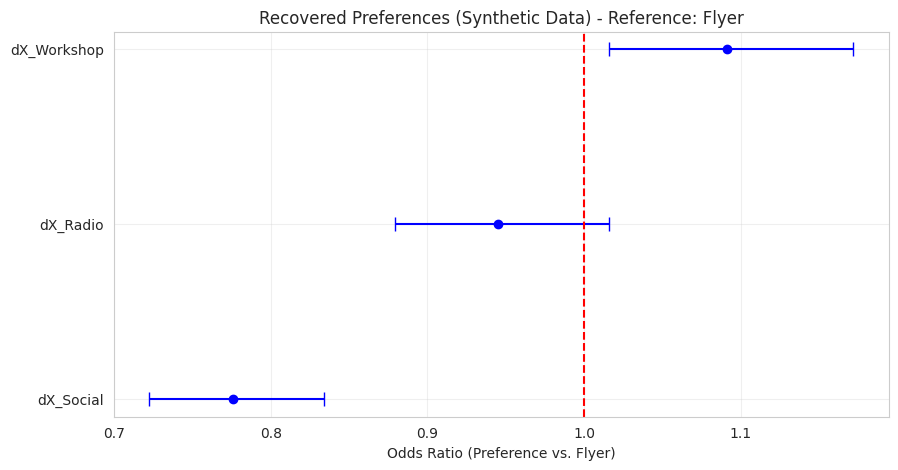

In [21]:
def analyze_preferences(df):
    # 1. One-Hot Encode the Categorical Variables
    # We use pandas get_dummies

    # Create combined df to ensure all columns exist
    # This is a bit of data wrangling to get X_A and X_B matrices
    cols = ['Who_A', 'How_A', 'Who_B', 'How_B']

    # Simple dummy encoding for the "How" channel (Focus of our analysis)
    # We create a dummy for 'How_Social Media' in A and B
    df['Social_A'] = (df['How_A'] == 'Social Media').astype(int)
    df['Social_B'] = (df['How_B'] == 'Social Media').astype(int)

    df['Radio_A'] = (df['How_A'] == 'Radio/TV').astype(int)
    df['Radio_B'] = (df['How_B'] == 'Radio/TV').astype(int)

    df['Workshop_A'] = (df['How_A'] == 'Online Workshop').astype(int)
    df['Workshop_B'] = (df['How_B'] == 'Online Workshop').astype(int)

    # 2. Calculate the Difference Vectors (X_A - X_B)
    # This is the input for our regression
    df['dX_Social'] = df['Social_A'] - df['Social_B']
    df['dX_Radio'] = df['Radio_A'] - df['Radio_B']
    df['dX_Workshop'] = df['Workshop_A'] - df['Workshop_B']

    # 3. Run Conditional Logistic Regression (using GLM)
    # Target: Choice_A (1 or 0)
    # Features: The difference vectors
    # Intercept: MUST be 0 (no constant) because if A and B are identical, P=0.5 (logit=0)

    X = df[['dX_Social', 'dX_Radio', 'dX_Workshop']]
    y = df['Choice_A']

    model = sm.Logit(y, X).fit()

    return model

# Run the model
model_results = analyze_preferences(df)
print(model_results.summary())

# VISUALIZATION: Replicating the Forest Plot
params = model_results.params
conf = model_results.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'Log_Odds']

# Convert to Odds Ratios
conf['OR'] = np.exp(conf['Log_Odds'])
conf['Lower_CI'] = np.exp(conf['2.5%'])
conf['Upper_CI'] = np.exp(conf['97.5%'])

# Plot
plt.figure(figsize=(10, 5))
plt.errorbar(conf['OR'], conf.index, xerr=[conf['OR'] - conf['Lower_CI'], conf['Upper_CI'] - conf['OR']],
             fmt='o', capsize=5, color='blue')
plt.axvline(x=1, color='red', linestyle='--')
plt.title('Recovered Preferences (Synthetic Data) - Reference: Flyer')
plt.xlabel('Odds Ratio (Preference vs. Flyer)')
plt.grid(True, alpha=0.3)
plt.show()

/tmp/ipython-input-28297449.py:53: UserWarning: 

The `join` parameter is deprecated and will be removed in v0.15.0. You can remove the line between points with `linestyle='none'`.

  ax = sns.pointplot(x='Odds Ratio', y='Channel', hue='Group',
/tmp/ipython-input-28297449.py:75: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


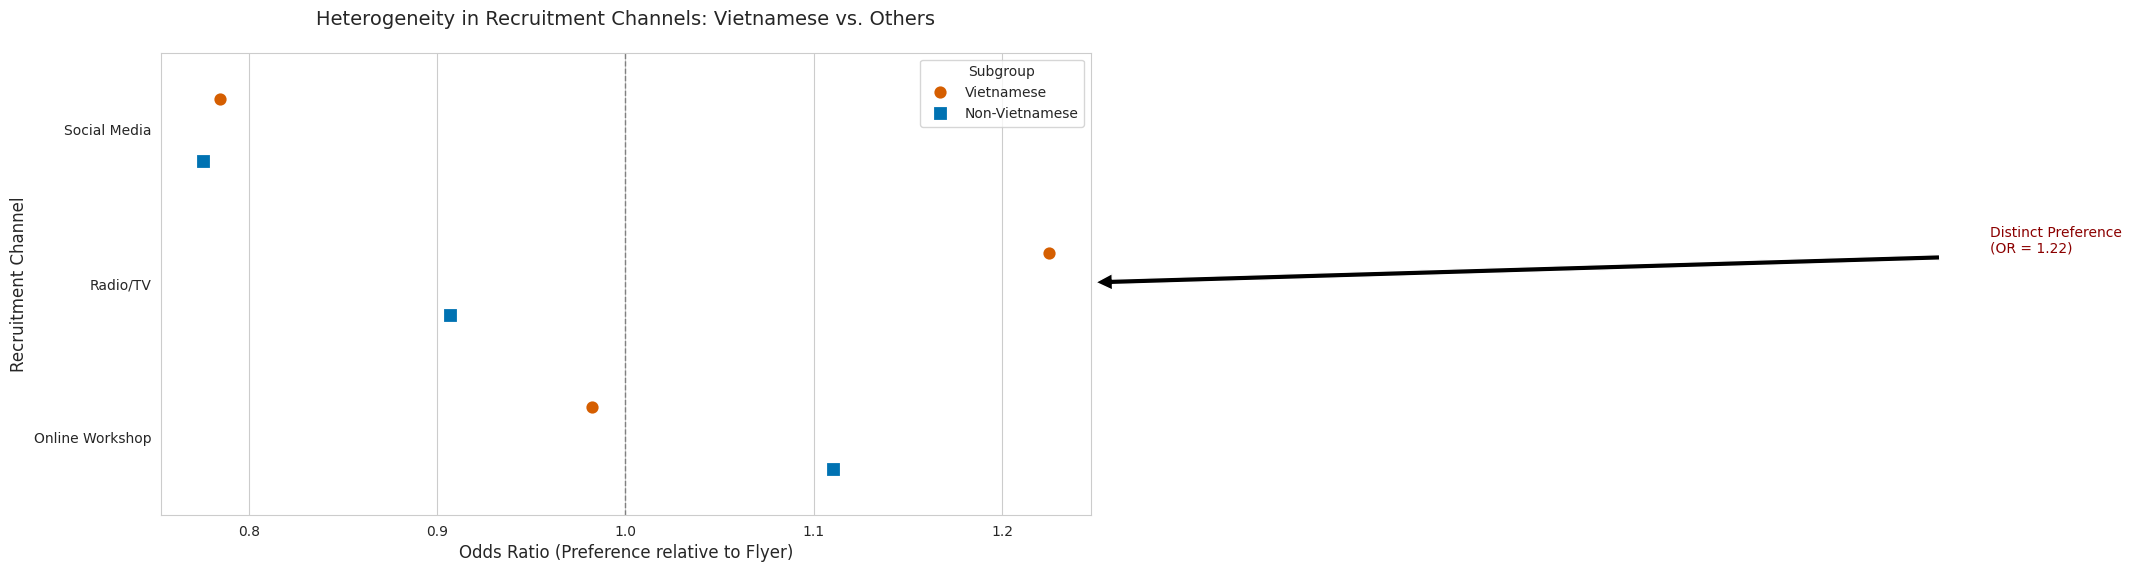


--- Numerical Comparison for Radio/TV ---
                   Group  Odds Ratio  Lower CI  Upper CI
dX_Radio      Vietnamese    1.224744  1.004734  1.492931
dX_Radio  Non-Vietnamese    0.907003  0.839078  0.980428


In [22]:
def run_subgroup_model(df, subgroup_name, filter_condition):
    """
    Runs the conditional logit model on a specific subset of the data.
    """
    # Filter the data
    subset_df = df[filter_condition].copy()

    if len(subset_df) < 50:
        print(f"Warning: Sample size too small for {subgroup_name}")
        return None

    # Recalculate difference vectors for this subset
    # (Attributes A - Attributes B)
    subset_df['dX_Social'] = subset_df['Social_A'] - subset_df['Social_B']
    subset_df['dX_Radio'] = subset_df['Radio_A'] - subset_df['Radio_B']
    subset_df['dX_Workshop'] = subset_df['Workshop_A'] - subset_df['Workshop_B']

    # Define X and y
    X = subset_df[['dX_Social', 'dX_Radio', 'dX_Workshop']]
    y = subset_df['Choice_A']

    # Fit Model
    try:
        model = sm.Logit(y, X).fit(disp=0) # disp=0 suppresses convergence output

        # Extract Results
        results = pd.DataFrame({
            'Channel': ['Social Media', 'Radio/TV', 'Online Workshop'],
            'Odds Ratio': np.exp(model.params),
            'Lower CI': np.exp(model.conf_int()[0]),
            'Upper CI': np.exp(model.conf_int()[1]),
            'Group': subgroup_name
        })
        return results
    except Exception as e:
        print(f"Error modeling {subgroup_name}: {e}")
        return None

# 1. Run models for both groups
# We compare Vietnamese (who had the unique preference) vs Everyone Else
viet_results = run_subgroup_model(df, "Vietnamese", df['Ethnicity'] == 'Vietnamese')
other_results = run_subgroup_model(df, "Non-Vietnamese", df['Ethnicity'] != 'Vietnamese')

# 2. Combine results for plotting
comparison_df = pd.concat([viet_results, other_results])

# 3. Create the Comparative Visualization
plt.figure(figsize=(12, 6))

# We use a pointplot to mimic the academic style of "Forest Plots"
# Join styles are turned off (linestyle='none') to look like distinct estimates
sns.set_style("whitegrid")
ax = sns.pointplot(x='Odds Ratio', y='Channel', hue='Group',
                   data=comparison_df, dodge=0.4, join=False,
                   palette={'Vietnamese': '#D55E00', 'Non-Vietnamese': '#0072B2'},
                   markers=['o', 's'], capsize=0.1)

# Add reference line at OR = 1 (No preference vs Flyer)
plt.axvline(x=1, color='gray', linestyle='--', linewidth=1)

# Customizing the chart
plt.title('Heterogeneity in Recruitment Channels: Vietnamese vs. Others', fontsize=14, pad=20)
plt.xlabel('Odds Ratio (Preference relative to Flyer)', fontsize=12)
plt.ylabel('Recruitment Channel', fontsize=12)
plt.legend(title='Subgroup')

# Annotate the specific insight
# We want to highlight the Radio/TV difference
radio_viet = comparison_df[(comparison_df['Channel'] == 'Radio/TV') & (comparison_df['Group'] == 'Vietnamese')]['Odds Ratio'].values[0]
plt.annotate(f'Distinct Preference\n(OR = {radio_viet:.2f})',
             xy=(radio_viet, 1), xytext=(radio_viet + 0.5, 0.8),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=10, color='darkred')

plt.tight_layout()
plt.show()

# Print the numerical proof
print("\n--- Numerical Comparison for Radio/TV ---")
print(comparison_df[comparison_df['Channel'] == 'Radio/TV'][['Group', 'Odds Ratio', 'Lower CI', 'Upper CI']])

--- RECRUITMENT CAMPAIGN ROI MODEL ---
Baseline (Flyer Campaign): 100 recruits

Group            Non-Vietnamese  Vietnamese
Channel                                    
Social Media               77.6        78.5
Online Workshop           111.0        98.2
Radio/TV                   90.7       122.5


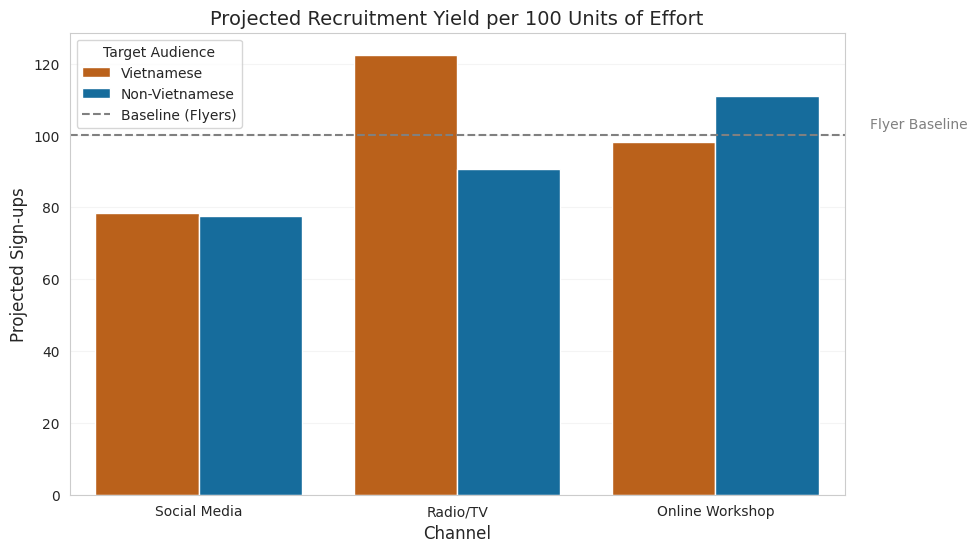


STRATEGIC FINDING:
Using Radio/TV for a general AAPI campaign is inefficient (90.7 recruits vs 100 for flyers).
However, for Vietnamese targets, Radio/TV is a high-yield channel, delivering 122.5 recruits.
RECOMMENDATION: Segment the budget. Use Social Media for general AAPI outreach, but allocate specific funds to Ethnic Radio for Vietnamese communities.


In [23]:
def calculate_projected_roi(comparison_df, baseline_recruits=100):
    """
    Calculates the projected recruitment yield based on Odds Ratios.
    Assumes cost-parity between channels for the sake of preference comparison.
    """
    # Create a copy to avoid SettingWithCopy warnings
    roi_df = comparison_df.copy()

    # Calculate Projected Recruits
    # Formula: Baseline * Odds Ratio
    roi_df['Projected Recruits'] = roi_df['Odds Ratio'] * baseline_recruits

    # Calculate the "Lift" (Gain/Loss relative to Flyer)
    roi_df['Recruitment Lift'] = roi_df['Projected Recruits'] - baseline_recruits

    return roi_df[['Group', 'Channel', 'Odds Ratio', 'Projected Recruits', 'Recruitment Lift']]

# 1. Run the Calculator
roi_metrics = calculate_projected_roi(comparison_df)

# 2. Display the "Strategic Insight" Table
# We want to pivot this to make it easy to read: Groups as columns, Channels as rows
strategy_table = roi_metrics.pivot(index='Channel', columns='Group', values='Projected Recruits')

# Reorder index for logical flow
strategy_table = strategy_table.reindex(['Social Media', 'Online Workshop', 'Radio/TV'])

print("--- RECRUITMENT CAMPAIGN ROI MODEL ---")
print(f"Baseline (Flyer Campaign): {100} recruits\n")
print(strategy_table.round(1))

# 3. Visualizing the "Missed Opportunity"
# This plot shows what happens if you treat Vietnamese participants like "Everyone Else"
plt.figure(figsize=(10, 6))

# Prepare data for a grouped bar chart
sns.barplot(x='Channel', y='Projected Recruits', hue='Group', data=roi_metrics,
            palette={'Vietnamese': '#D55E00', 'Non-Vietnamese': '#0072B2'})

# Add the Baseline Line
plt.axhline(y=100, color='gray', linestyle='--', label='Baseline (Flyers)')
plt.text(2.6, 102, 'Flyer Baseline', color='gray')

plt.title('Projected Recruitment Yield per 100 Units of Effort', fontsize=14)
plt.ylabel('Projected Sign-ups', fontsize=12)
plt.xlabel('Channel', fontsize=12)
plt.legend(title='Target Audience')
plt.grid(axis='y', alpha=0.2)

plt.show()

# 4. Generate the Recommendation Text
viet_radio_yield = roi_metrics[(roi_metrics['Group']=='Vietnamese') & (roi_metrics['Channel']=='Radio/TV')]['Projected Recruits'].values[0]
general_radio_yield = roi_metrics[(roi_metrics['Group']=='Non-Vietnamese') & (roi_metrics['Channel']=='Radio/TV')]['Projected Recruits'].values[0]

print(f"\nSTRATEGIC FINDING:")
print(f"Using Radio/TV for a general AAPI campaign is inefficient ({general_radio_yield:.1f} recruits vs 100 for flyers).")
print(f"However, for Vietnamese targets, Radio/TV is a high-yield channel, delivering {viet_radio_yield:.1f} recruits.")
print(f"RECOMMENDATION: Segment the budget. Use Social Media for general AAPI outreach, but allocate specific funds to Ethnic Radio for Vietnamese communities.")